<a href="https://colab.research.google.com/github/2303A51893/data-mining/blob/main/lab5(DM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
data_with_outliers=np.concatenate([data,outliers])

In [3]:
data_with_outliers

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  

In [4]:
#convert to DataFrame
df=pd.DataFrame(data_with_outliers,columns=['value'])

In [5]:
df

,value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,7.087055
101,6.110539
102,5.599327
103,6.688076


In [6]:
#step i: Detect outliers  using IQR method
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR


In [7]:
Q1

-0.5622875292409727

In [8]:
Q3

0.6116762888408679

In [9]:
IQR

1.1739638180818406

In [10]:
lower_bound

-2.3232332563637335

In [11]:
upper_bound

2.372622015963629

In [12]:
outliers_iqr=df[(df['value']<lower_bound) | (df['value']>upper_bound)]

In [13]:
outliers_iqr

,value
74,-2.619745
100,7.087055
101,6.110539
102,5.599327
103,6.688076
104,9.714549


In [14]:
#step2:Detect outliers using z-score method
z_scores=stats.zscore(df['value'])
outliers_zscore=df[np.abs(z_scores)>3]

In [15]:
outliers_zscore

,value
100,7.087055
101,6.110539
102,5.599327
103,6.688076
104,9.714549


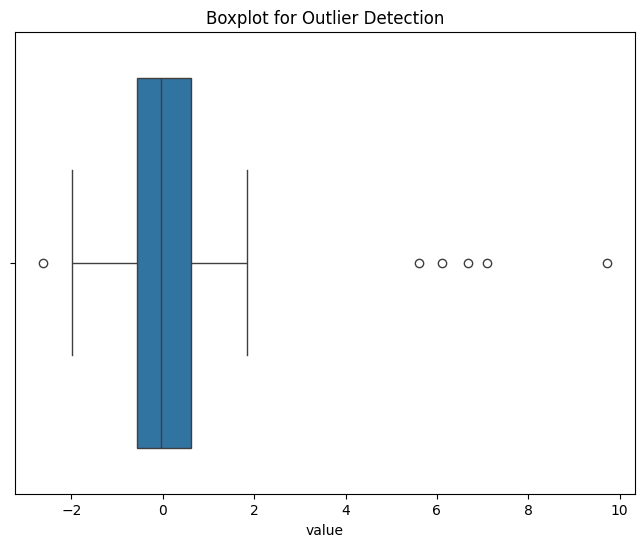

In [16]:
#step3:visualize outliers using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [17]:
#step 4:Handle outliers
#capping:Set outliers to the upper and lower bounds
df_capped=df.copy()
df_capped['value']=np.clip(df_capped['value'],lower_bound,upper_bound)

In [18]:
df_capped

,value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,2.372622
101,2.372622
102,2.372622
103,2.372622


In [19]:
#Removal : Drop rows with outliers
df_removed=df.copy()
df_removed['value']=np.clip(df_removed['value'],lower_bound,upper_bound)

In [20]:
df_removed

,value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,2.372622
101,2.372622
102,2.372622
103,2.372622
